In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from stock_indicators import indicators
from decimal import Decimal

In [145]:
df = pd.read_csv('data/round1/0.csv', delimiter=';')
products = df['product'].unique()
df = df[df['product'] == products[1]]
df = df[df.timestamp < 3000*100]

start_date = '2024-01-01'
num_days = len(df)

# Create a datetime range
date_range = pd.date_range(start=start_date, periods=num_days)


quotes_list = [
    Quote(d,o,h,l,c,v) 
    for d,o,h,l,c,v 
    in zip(date_range, df['mid_price'], df['mid_price'], df['mid_price'], df['mid_price'], df['bid_volume_1'] + df['ask_volume_1'])
]   
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.0
6,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,25,NaN,NaN,NaN,NaN,5040.5,0.0
9,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,6,5044.0,25.0,NaN,NaN,5039.5,0.0


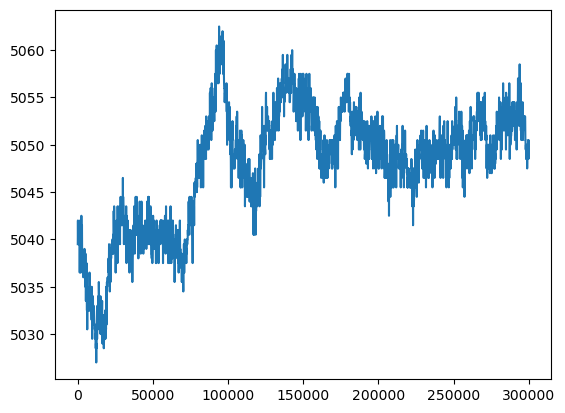

In [156]:
X = df['timestamp']
Y = df['mid_price']
plt.plot(X, Y)

# Online Linear regression

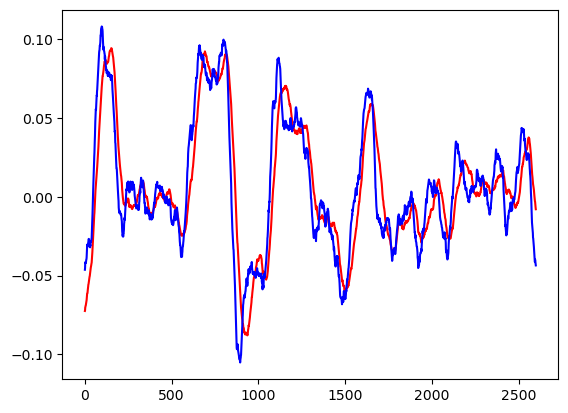

In [157]:
window_size = 150
derivative = []
weighted = []
l = window_size + 2600

for i in range(window_size, l):
    # weight = np.linspace(0, 1, num=window_size)
    interval = 2
    weight = np.exp(np.linspace(-interval, interval, num=window_size))
    model = model.fit(np.linspace(0, window_size, num=window_size).reshape(-1,1), Y[i-window_size:i])
    derivative.append(model.coef_[0])

    model = LinearRegression()
    model_w = model.fit(np.linspace(0, window_size, num=window_size).reshape(-1,1), Y[i-window_size:i], weight)
    # model = model.fit(X[i-window_size:i].values.reshape(-1, 1), Y[i-window_size:i])
    weighted.append(model_w.coef_[0])
# plt.plot(X[window_size:], derivative)

plt.plot(derivative[:l-window_size], color ='red')
plt.plot(weighted[:l-window_size], color='blue')

0.03782181818181927 1


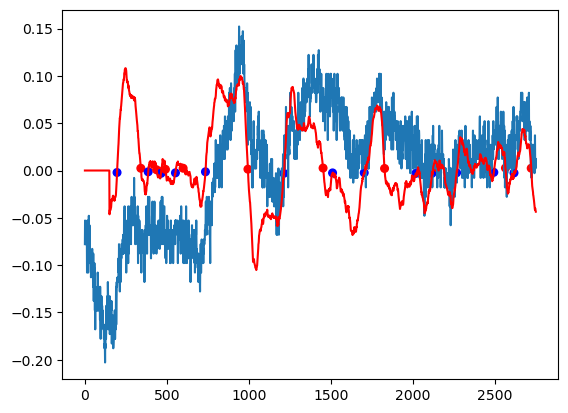

In [161]:
derivative = weighted
X = (df['timestamp']/100)[:l]
Y = df['mid_price'][:l]
YY=  (Y-Y.mean())/100
marker = []
th = 0.003
total_gain = 0
quantity = 0
for i in range(len(Y)-window_size):
    slope = derivative[i]
    current_price = YY.values[i + window_size]
    previous_slopes = np.array(derivative[i-20:i])
    if abs(slope) < th and all(np.abs(previous_slopes) > th):
        if previous_slopes.mean() > 0:
            #sell
            marker.append((X.values[i + window_size], slope, 'r'))
            total_gain += current_price
            quantity -= 1
        else:
            #buy
            marker.append((X.values[i + window_size], slope, 'b'))
            total_gain -= current_price
            quantity += 1


plt.plot(X, (Y-Y.mean())/100)
plt.plot([0]*window_size+derivative[:l-window_size], color ='red')
# plt.plot([0]*window_size+weighted[:l-window_size], color='blue')
plt.scatter([m[0] for m in marker],[m[1] for m in marker], c=[m[2] for m in marker], s=30)
print(total_gain, quantity)

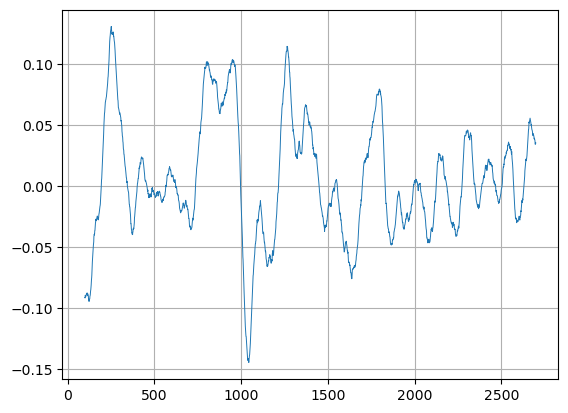

In [132]:
results = indicators.get_slope(quotes_list, window_size)
res = pd.DataFrame({'mid_price': df['mid_price'], 'epma': [r.slope for r in results]})
res['epma'] = res['epma']/10
# res = res.iloc[:100]
l = int(len(res) /10)
l  = 2700

# plt.plot(X[:l], (res['mid_price'][:l]-res['mid_price'][:l].mean())/(res['mid_price'][:l].std()*20), linewidth=0.7, label='mid_price')
plt.plot(X[:l], res['epma'][:l], linewidth=0.7, label='epma')
plt.grid()

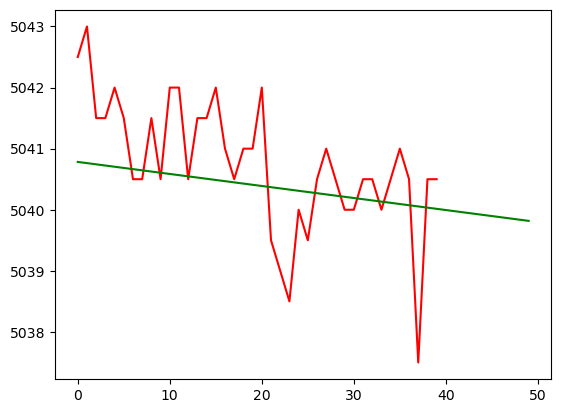

In [46]:
i = 50
window_size = 40
model = LinearRegression()
weight = np.linspace(0, 1, num=window_size)
weight = np.exp(np.linspace(-5, 5, num=window_size))
# weight[:window_size//2] = 0
# weight = np.zeros(window_size)
# weight[window_size-4:] = 1
model = model.fit(np.linspace(0, window_size, num=window_size).reshape(-1,1), Y[i-window_size:i], weight)
plt.plot(Y[i-window_size:i].values.reshape(-1, 1), color='red')

plt.plot(model.predict(np.linspace(0,i).reshape(-1, 1)), color='green')

In [45]:
weight

array([4.53999298e-05, 7.58176466e-05, 1.26615076e-04, 2.11446518e-04,
       3.53114586e-04, 5.89699522e-04, 9.84795135e-04, 1.64460275e-03,
       2.74647805e-03, 4.58660406e-03, 7.65960493e-03, 1.27915004e-02,
       2.13617392e-02, 3.56739933e-02, 5.95753834e-02, 9.94905805e-02,
       1.66148752e-01, 2.77467552e-01, 4.63369369e-01, 7.73824437e-01,
       1.29228279e+00, 2.15810553e+00, 3.60402502e+00, 6.01870304e+00,
       1.00512028e+01, 1.67854564e+01, 2.80316249e+01, 4.68126678e+01,
       7.81769118e+01, 1.30555036e+02, 2.18026232e+02, 3.64102673e+02,
       6.08049571e+02, 1.01543962e+03, 1.69577889e+03, 2.83194193e+03,
       4.72932829e+03, 7.89795366e+03, 1.31895415e+04, 2.20264658e+04])

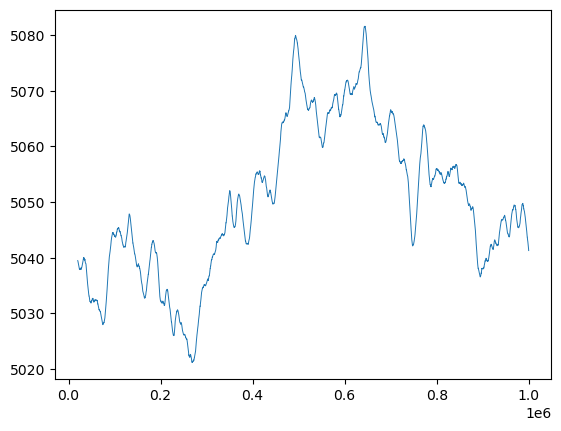

In [9]:
results = indicators.get_epma(quotes_list, 200)
res = pd.DataFrame({'mid_price': df['mid_price'], 'epma': [r.epma for r in results]})
res['epma'] = res['epma']/10
# res = res.iloc[:100]
l = len(res)
# plt.plot(X[:l], res['mid_price'][:l], linewidth=0.7, label='mid_price')
plt.plot(X[:l], res['epma'][:l], linewidth=0.7, label='epma')

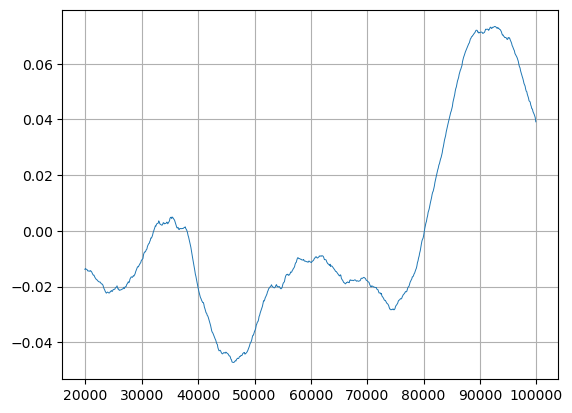

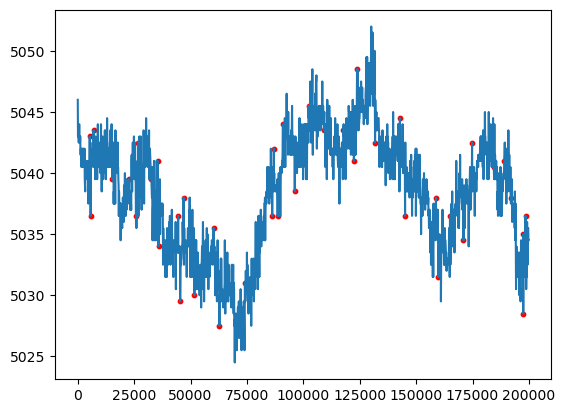

In [12]:

results =indicators.get_parabolic_sar(quotes_list, 0.004, 0.05)
results[-1].is_reversal

# r = np.array([r.is_reversal for r in results if r.is_reversal is not None else False])
r = np.array([r.is_reversal if r.is_reversal is not None else False for r in results])

xr = np.array([r.sar for r in results])
l= 2000
plt.plot(X[:l], Y[:l])
plt.scatter(X[:l][r[:l]], Y[:l][r[:l]], color='red', s=10)

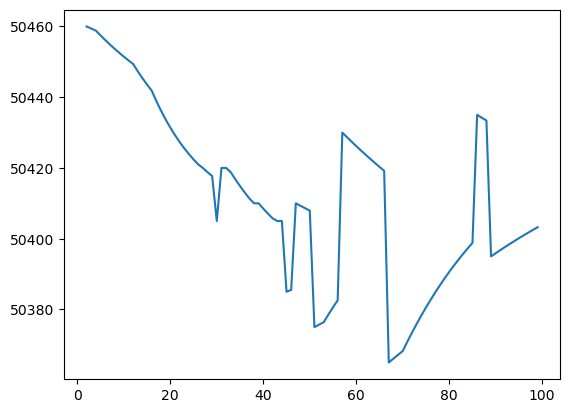

In [68]:
plt.plot(xr[:l])